<a href="https://colab.research.google.com/github/freedom-780/Weather_trends/blob/main/Copy_of_Weather_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Outline 

*   Tools used: Python in a Colab Notebook
*   Calculated the moving average using avg_temp.rolling().mean()
*   Used the seaborn library to visualize the trends using a standardline plot. No other considerations were needed in this case
*   Colab file and data files avaliable at: https://github.com/freedom-780/Weather_trends/blob/main/Weather_project.ipynb
*  SQL commands used to extract the data: SELECT city, country, avg_temp, year
  FROM city_data; SELlECT avg_temp, year FROM city_data
*   CO2 yearly average and growth data files are from: Ed Dlugokencky and Pieter Tans, NOAA/GML (www.esrl.noaa.gov/gmd/ccgg/trends/)








# Import Data from SQL Files and other CSV files 




Import library files and import csv files from Github repository 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
city_weather = "https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/city_data.csv"
city_weather = pd.read_csv(city_weather)
city_weather.head()

,city,country,avg_temp,year
0,Abidjan,Côte D'Ivoire,25.58,1849
1,Abidjan,Côte D'Ivoire,25.52,1850
2,Abidjan,Côte D'Ivoire,25.67,1851
3,Abidjan,Côte D'Ivoire,NaN,1852
4,Abidjan,Côte D'Ivoire,NaN,1853


Import Chicago weather file 

In [2]:
 chicago_weather = city_weather[city_weather["city"] == "Chicago"]
chicago_weather.head()


,city,country,avg_temp,year
15107,Chicago,United States,5.44,1743
15108,Chicago,United States,11.73,1744
15109,Chicago,United States,1.80,1745
15110,Chicago,United States,NaN,1746
15111,Chicago,United States,NaN,1747


Import Global Weather file 

In [3]:
global_weather = pd.read_csv('https://raw.githubusercontent.com/freedom-780/Weather_trends/b4066594b64afa00050fffdfc4995868d2f36ed1/global_data.csv')
global_weather.head()

,avg_temp,year
0,8.72,1750
1,7.98,1751
2,5.78,1752
3,8.39,1753
4,8.47,1754


Import globle CO2 data

In [4]:
global_co2_ann_average = pd.read_csv('https://raw.githubusercontent.com/freedom-780/Weather_trends/main/co2_annmean_gl.csv')
global_co2_ann_average.head()

,year,mean
0,1980,338.91
1,1981,340.11
2,1982,340.86
3,1983,342.53
4,1984,344.07


In [5]:
global_co2_ann_growth = pd.read_csv('https://raw.githubusercontent.com/freedom-780/Weather_trends/main/co2_gr_gl.csv')
global_co2_ann_growth.head()

,year,ann_inc
0,1959,0.96
1,1960,0.71
2,1961,0.78
3,1962,0.56
4,1963,0.57



# Exploratory Data Analysis

check for null values 

In [6]:
chicago_weather.isnull().sum()

city        0
country     0
avg_temp    4
year        0
dtype: int64

fill the NA with previous values for the Chicago trend file
and double check if there still are null values

In [7]:
chicago_weather_fill = chicago_weather.fillna(method='ffill')
chicago_weather_fill.isnull().sum()

city        0
country     0
avg_temp    0
year        0
dtype: int64

In [8]:
global_weather.isnull().sum()

avg_temp    0
year        0
dtype: int64

Initial Plot of data without moving averages

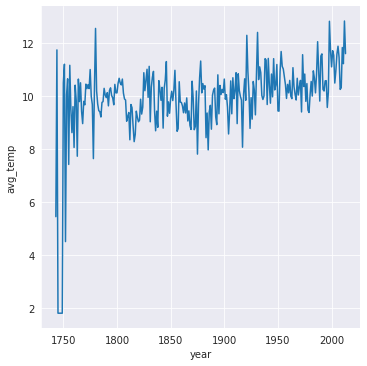

In [9]:
sns.set_style("darkgrid") 
sns.relplot(x="year", y="avg_temp", kind="line", data=chicago_weather_fill)


Plot the average CO2 rate 

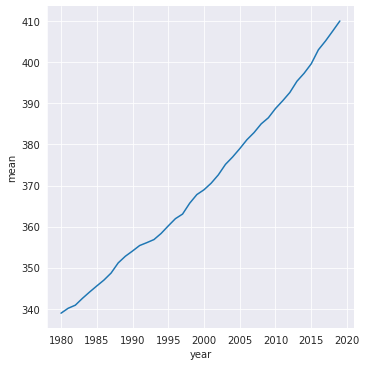

In [10]:
sns.relplot(x="year", y="mean", kind="line", data=global_co2_ann_average)

Plot CO2 the annual growth rate per year using rolling average

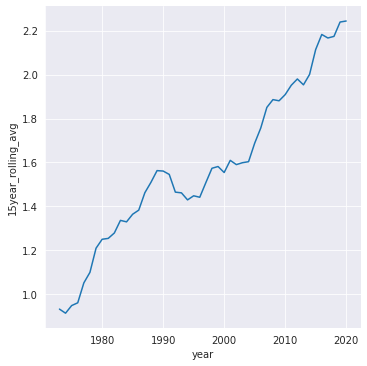

In [11]:
global_co2_ann_growth[ '15year_rolling_avg' ] = global_co2_ann_growth.ann_inc.rolling(15).mean() # Calculate the rolling average
global_co2_ann_growth.head(16)
sns.relplot(x="year", y="15year_rolling_avg", kind='line', data=global_co2_ann_growth)

# Calculate the Moving Average of Data and Plot 

Use avg_temp.rolling().mean() methods to calcuate the average mean
for chicago and global weather trends. According to the National Center for Environmental Information, 30 years is the typical moving average, but 15 is used to find smaller variations for climate change, so 15 years are used. Different averages were tested and 15 seems to be a good compromise

In [12]:
chicago_weather_fill[ '15year_rolling_avg' ] = chicago_weather_fill.avg_temp.rolling(15).mean()
chicago_weather_fill.head(16)

,city,country,avg_temp,year,15year_rolling_avg
15107,Chicago,United States,5.44,1743,NaN
15108,Chicago,United States,11.73,1744,NaN
15109,Chicago,United States,1.80,1745,NaN
15110,Chicago,United States,1.80,1746,NaN
15111,Chicago,United States,1.80,1747,NaN
15112,Chicago,United States,1.80,1748,NaN
15113,Chicago,United States,1.80,1749,NaN
15114,Chicago,United States,10.49,1750,NaN
15115,Chicago,United States,11.19,1751,NaN
15116,Chicago,United States,4.50,1752,NaN


plot moving average Chicago weather trends

(6.0, 11.5)

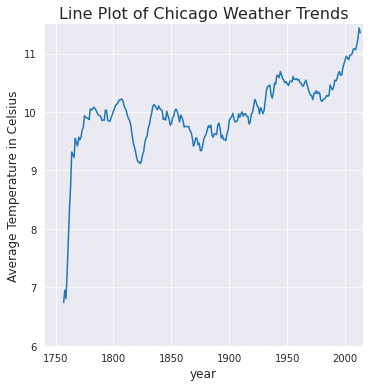

In [13]:

sns.relplot(x="year", y='15year_rolling_avg', kind="line", data=chicago_weather_fill)
plt.xlabel("year", size=12)
plt.ylabel("Average Temperature in Celsius", size=12)
plt.title("Line Plot of Chicago Weather Trends", size=16)
plt.xlim(xmin=1740, xmax=2015) # Used these limits from the max and mins from the two data sets
plt.ylim(ymin=6, ymax=11.5) # Used these limits from the max and mins from the two data sets



Get some statistics on the data

In [14]:
chicago_weather_fill.describe()

,avg_temp,year,15year_rolling_avg
count,271.000000,271.000000,257.000000
mean,9.906494,1878.000000,9.984861
std,1.491861,78.375166,0.614833
min,1.800000,1743.000000,6.739333
25%,9.450000,1810.500000,9.751333
50%,10.100000,1878.000000,9.977333
75%,10.580000,1945.500000,10.324000
max,12.820000,2013.000000,11.437333


plot moving average Global weather trends

In [15]:
global_weather['15year_rolling_avg_global'] = global_weather.avg_temp.rolling(15).mean() 

(6.0, 11.5)

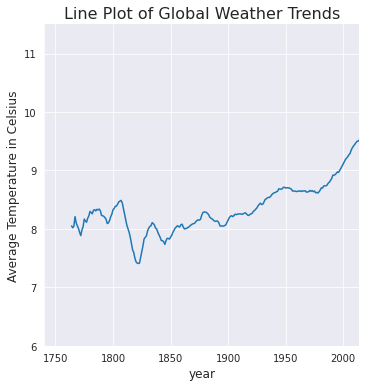

In [16]:
sns.relplot(x="year", y='15year_rolling_avg_global', kind="line", data=global_weather)
plt.xlabel("year", size=12)
plt.ylabel("Average Temperature in Celsius", size=12)
plt.title("Line Plot of Global Weather Trends", size=16)
plt.xlim(xmin=1740, xmax=2014) # Used these limits from the max and mins from the two data sets
plt.ylim(ymin=6, ymax=11.5) # Used these limits from the max and mins from the two data sets




Get some statistics on the data

In [17]:
global_weather.describe()

,avg_temp,year,15year_rolling_avg_global
count,266.000000,266.000000,252.000000
mean,8.369474,1882.500000,8.345159
std,0.584747,76.931788,0.419722
min,5.780000,1750.000000,7.408667
25%,8.082500,1816.250000,8.057500
50%,8.375000,1882.500000,8.256667
75%,8.707500,1948.750000,8.640667
max,9.830000,2015.000000,9.564667


# Final Temperature Moving Average Graphs Plotted Together 

Text(0.5, 1.0, 'Line Chart of Chicago & Global Temperatures')

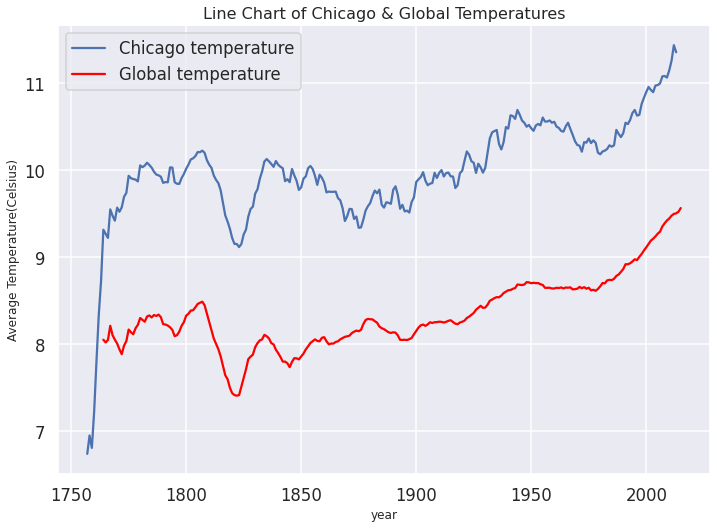

In [19]:
sns.set(rc={'figure.figsize':(11.7,8.27)}) # set figure size
sns.set_theme(context='talk') # set graph theme
sns.lineplot(x="year", y='15year_rolling_avg', data=chicago_weather_fill, label='Chicago temperature', size_norm=10)
sns.lineplot(x="year", y='15year_rolling_avg_global', data=global_weather, label="Global temperature", color='red',size_norm=10)
plt.xlabel("year", size=12)
plt.ylabel("Average Temperature(Celsius)", size=12)
plt.title("Line Chart of Chicago & Global Temperatures", size=16)






In [20]:
sns.lineplot?

# Final CO2 Graphs 

Text(0.5, 1.0, 'Line Chart of Average Annual CO2 increases')

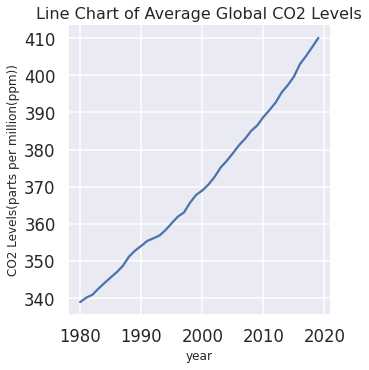

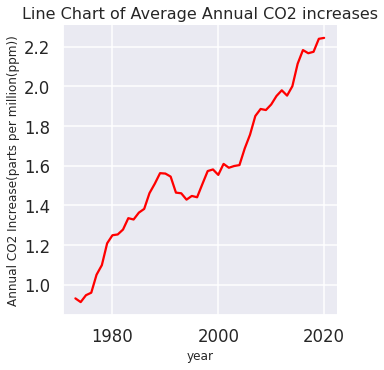

In [21]:

sns.relplot(x="year", y="mean", kind="line", data=global_co2_ann_average) # Annual CO2 Conccentration Graph
plt.xlabel("year", size=12)
plt.ylabel("CO2 Levels(parts per million(ppm))", size=12)
plt.title("Line Chart of Average Global CO2 Levels", size=16)

sns.relplot(x="year", y="15year_rolling_avg", kind='line', data=global_co2_ann_growth,color='red') # Annual CO2 growth graph
plt.xlabel("year", size=12)
plt.ylabel("Annual CO2 Increase(parts per million(ppm))", size=12)
plt.title("Line Chart of Average Annual CO2 increases", size=16)


# Observations

Observations:

1.   Both Graphs share a similar increasing trends temperature trends, standard deviations ,and means. Also, the same drop in temperature is seen between 1800 and 1850 that is about 1C, which is a simificant drop in terms of climate change. A theory for this drop may be because this was some of the beginings of industrialization.
2.   The Chicago weather trends graph has a steeper rise(slope) in temperature around 1750-1800 and after 1900 unlike the global trend graph.
3. The Graphs have sligthy different ranges: THe Chicago graph has a range from around 7C-11C and the global graph has a range of around 7C-10C
4.   Both graphs show around the 2000s or eariler a steep raise in temperature that seems to be continuing. Carbon dixiode, that is one of the major greenhouse gases that remain in the atmosphere and heat up the earth, is the primary cause of this.
5.  These peaks in temperatures(that appears to be from 1980 to current day) coincide with increasing CO2 levels and increasing annual CO2 growth rates, as seen in the above graphs. 







